<img src="./logo_UNSAM.jpg" align="right" width="350" />  -->
#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº0
#### Sofía Gervasi


## 1. Introducción

El objetivo principal de este trabajo es implementar un generador de señales que permita parametrizar la amplitud máxima, el valor medio, la frecuencia, la fase, la cantidad de muestras y la frecuencia de muestreo del ADC. Una vez desarrollado el código, se realizará una simulación del comportamiento de la señal en las frecuencias de 1 Hz, 500 Hz, 999 Hz, 1001 Hz y 2001 Hz, para analizar su comportamiento bajo estas condiciones, teniendo en cuenta el teorema de muestreo de Nyquist.

## 2. Desarrollo

Para comenzar, se construye el generador de señales con los parámetros indicados, estableciendo la frecuencia de muestreo (fs) en 1000 Hz  y el número de muestras (N) en 1000. 

En el caso inicial, se buscará ilustrar el resultado de muestrear una señal a una frecuencia mucho menor a la de Nyquist (1 Hz). 

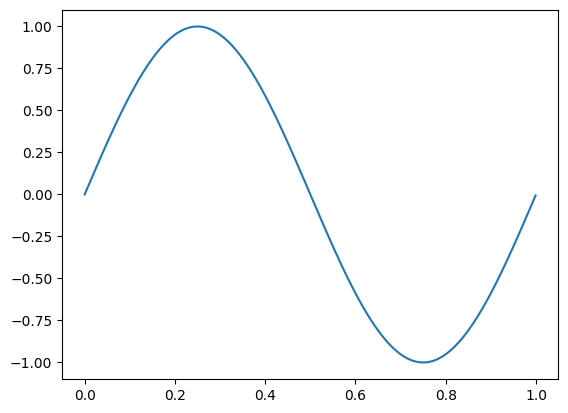

In [37]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 13 19:11:47 2025

@author: Sofía
"""

import numpy as np
import matplotlib.pyplot as plt


#Defino variables
vmax= 1  #Volts 
dc = 0  #Volts
ff = 1  #Hz
ph = 0 #Radianes
nn = 1000 # cantidad de muestras
fs = 1000 #Hz

#Defino la funcion
def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
    tt= np.linspace(0,(nn-1)*(1/fs),nn)
    xx = vmax* np.sin(2 * np.pi * ff * tt + ph) + dc
    return xx, tt

xx, tt = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)

# Grafico la señal
plt.figure()
plt.plot(tt, xx)

Como siguiente paso, se analizará que sucede cuando la frecuencia de la señal (ff) es igual a la frecuencia de Nyquist. 

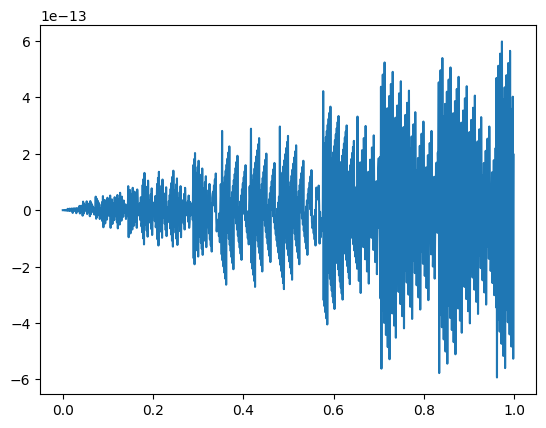

In [38]:
ff=500 #Hz

xx, tt = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)

plt.figure()
plt.plot(tt, xx)

Veremos qué sucede al muestrear a la misma frecuencia, pero ahora cuando la señal no está en fase. 

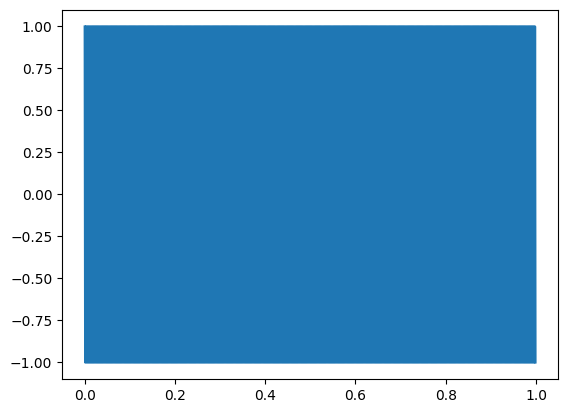

In [39]:
ff=500 #Hz
ph= np.pi/2

xx, tt = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)

plt.figure()
plt.plot(tt, xx)

Luego, se procederá a simular que sucede cuando la frecuencia de la señal (ff) es muy próxima a la frecuencia de muestreo (fs). 

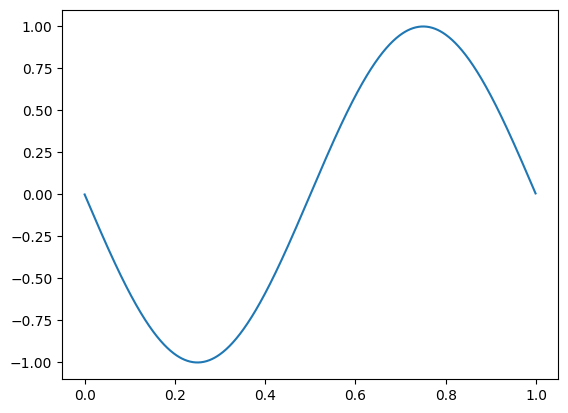

In [40]:
ff=999 #Hz
ph= 0

xx, tt = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)

plt.figure()
plt.plot(tt, xx)

A continuación, se simulará el caso en el cual la frecuencia de la señal (ff) es ligeramente superior a la frecuencia de muestreo del ADC (fs).

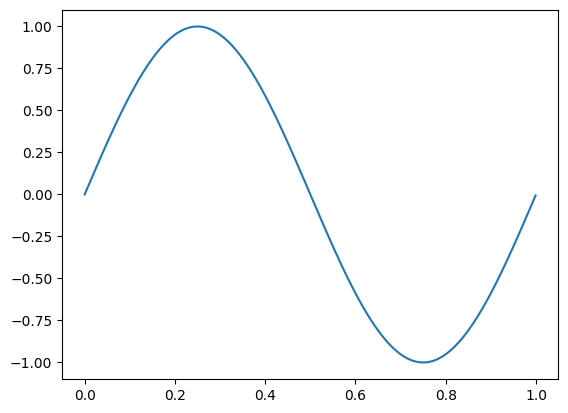

In [41]:
ff=1001 #Hz

xx, tt = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)

plt.figure()
plt.plot(tt, xx)

Por último, se simulará el comportamiento del generador, con una frecuencia (ff) de más del doble de la frecuencia de muestreo (fs). 

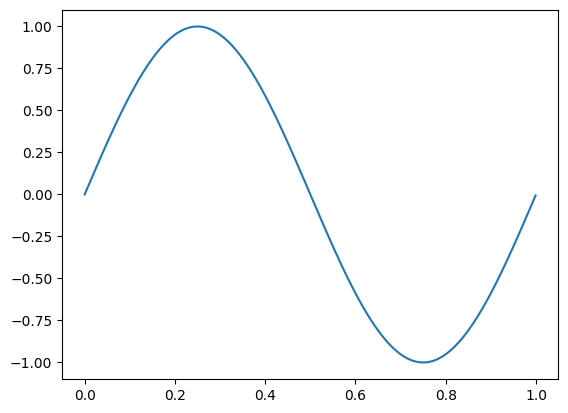

In [42]:
ff=2001 #Hz

xx, tt = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)

plt.figure()
plt.plot(tt, xx)

## Conclusiones

El teorema de muestreo de Nyquist-Shannon establece que para reconstruir una señal correctamente a partir de sus muestras, la frecuencia de muestreo (fs) debe ser al menos el doble de la frecuencia más alta (ff) presente en la señal original.

Cuando la frecuencia de la señal es igual a 1 Hz, la misma se reconstruye con precisión. Esto se debe a que la frecuencia de muestreo (fs = 1000 Hz) es significativamente mayor que el doble de la frecuencia de la señal original.

A medida que la frecuencia de la señal aumenta, disminuye la cantidad de muestras que se toman por período. Específicamente, para el caso que la frecuencia de la señal es igual a la frecuencia de Nyquist (fN = fs/2 = 500 Hz), se toman 2N/fs muestras por periódo, y considerando que en este contexto N=fs, cada ciclo queda representado por solo dos puntos. Si la señal original está en fase, los dos puntos muestreados corresponderán a los cruces por cero de la señal; si en cambio tiene una fase de π/2, los puntos coincidirán con los máximos y mínimos de la señal. 

En el caso de ff = 999 Hz, la frecuencia de la señal supera la frecuencia de Nyquist. Esto da lugar a un fenómeno llamado aliasing, donde la señal reconstruida adquiere una frecuencia diferente a la original. La frecuencia aparente de la señal resultante (f′) se determina mediante la relación f′=ff+k⋅fs (donde k es un entero adecuado para que f′ esté dentro del rango de Nyquist). Si calculamos f′ para este caso, obtenemos f′=999−1000=−1 Hz. Esto significa que la señal se reconstruye incorrectamente como una señal de 1 Hz, pero invertida en fase.

Finalmente, al considerar ff = 1001 Hz, la frecuencia de la señal es mayor que la frecuencia de muestreo. En este escenario, la señal también se reconstruye incorrectamente como una señal de 1 Hz, a pesar de que su frecuencia original era de 1001 Hz. Un comportamiento similar se observa cuando ff = 2001 Hz.

En conclusión, para asegurar una reconstrucción precisa, la frecuencia de muestreo debe ser considerablemente mayor al doble de la frecuencia máxima de la señal. Cuando esto no sucede, el resultado es una reconstrucción incorrecta de la señal con una frecuencia y una fase diferente a la original. 

